[Annotated notes](https://pwskills.notion.site/Annotated-Notes-9-d7f3b1914c984c009b4c3f69bb80054a)\
[Notes with code](https://pwskills.notion.site/Class-Notes-9-c02ca0e1279849cc8142ffdd6633dedf)

# Recursion

The process of a function calling itself inside it is known as *recursion*. Such a function is known as a *recursive function*. To understand how this, we can have a look at a toy called russian dolls. These dolls gradually decrease in size, and are placed inside each other.

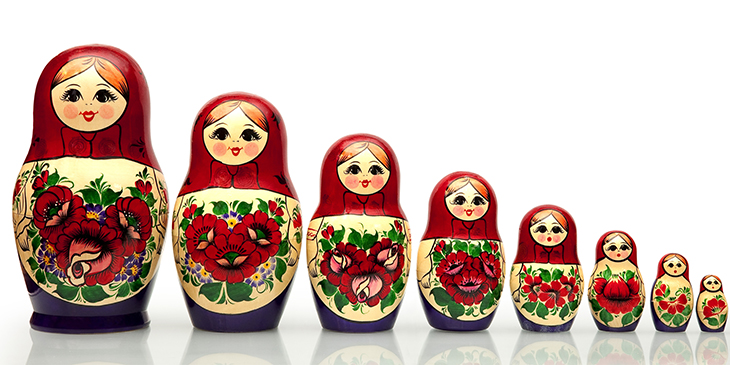

Recursion is something similar.

Now, how do we solve problems using recursion? Recursion is used to solve a bigger problem by dividing it into smaller sub problems. Let us take a classic example of recursion. Let us find the sum of all the numbers from $n$ to $1$. Let us consider $n=5$. Sum of these numbers is
$$1+2+3+4+5=15$$
We can also use the formula
$$\sum_{i=1}^n i = \dfrac{n \left( n+1 \right)}{2}$$
Now, how to use recursion? Let $\text{Sum}\left( 5, 1 \right)$ denote the sum from $5$ to $1$. Have a look at the following.
$$\text{Sum}\left( 5, 1 \right) = 5 +\text{Sum}\left( 4, 1 \right)$$
We can further simplify this as
$$\text{Sum}\left( 5, 1 \right) = 5 + 4 +\text{Sum}\left( 3, 1 \right)$$
We can see how the function $\text{Sum}$ is calling itself. Similarly, doing this on and on, we can write
$$\text{Sum}\left( 5, 1 \right) = 5 + 4 + 3 + 2 +\text{Sum}\left( 1, 1 \right)$$
The problem has gone from relatively difficult, i.e., from finding the sum from $5$ to $1$, to trivial, i.e., to find the sum from $1$ to $1$, which is simply $1$. So, we have finally arrived at
$$\text{Sum}\left( 5, 1 \right) = 5 + 4 + 3 + 2 + 1 = 15$$
This is how a difficult problem is solved by solving a simpler sub problem(s). The simpler problem is also known as the *base case* or the *stopping condition*. This is where the recursion stops. If there is no base case, the function will call itself infinitely. In this example, the base case is the case with $n=1$. The return value of this function at the base case is $1$. The recurrence relation is the following
$$\text{Sum}\left( n \right) = n + \text{Sum}\left( n-1 \right)$$
where, $\text{Sum}\left( n \right)$ denotes the sum from $n$ to $1$. Let us see how to code this.

In [1]:
def sum(n: int):
    if n == 1:  # base case
        return 1
    else:
        return n + sum(n - 1)

sum(5)

15

**Question:** The Fibonacci numbers, commonly denoted `F(n)` form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones, starting from `0` and `1`. That is,
```
F(0) = 0, F(1) = 1
F(n) = F(n - 1) + F(n - 2), for n > 1.
```
Given `n`, calculate `F(n)`.

**Explanation:**

The Fibonacci numbers are the numbers in the following integer sequence.

`0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...`

In mathematical terms, the sequence `Fn` of Fibonacci numbers is defined by the recurrence relation
```
Fn = Fn-1 + Fn-2
```
with seed values
```
F0 = 0 and F1 = 1.
```
Time Complexity: Exponential, i.e., $\mathcal{O}\left( 2^n \right)$. This is because every function calls two other functions.

Auxiliary space complexity: $\mathcal{O}\left( n \right)$, as the maximum depth of the recursion tree is $n$.

**Solution:**

In [2]:
def fibonacci_nums(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibonacci_nums(n - 1) + fibonacci_nums(n - 2)

fibonacci_nums(12)

144

In [3]:
# A more optimal solution
def fibonacci_nums(n):
    if n == 0 or n == 1:
        return n
    return fibonacci_nums(n - 1) + fibonacci_nums(n - 2)

fibonacci_nums(12)

144

**Question:** Given an integer `n`, return `True` if it is a power of `4`. Otherwise, return `False`. An integer `n` is a power of `4`, if there exists an integer `x` such that `n == 4^x`.

**Example 1:**

Input: `n = 16`.

Output: `True`.

**Example 2:**

Input: `n = 5`.

Output: `False`.

**Example 3:**

Input: `n = 1`.

Output: `True`.

**Solution:** To understand this, have a look at the following.
$$4^0 = 1$$
$$4^1 = 4$$
$$4^2 = 4\times 4 = 16$$
$$4^3 = 4\times 4\times 4 = 64$$
$$4^4 = 4\times 4\times 4\times 4 = 256$$
$$\vdots$$
$$4^m = \underbrace{4\times 4\times 4\times 4\times 4\times \dots \times 4}_{m\text{ times}}$$
We can see one of the base case, i.e., if the number is $1$, it is obviously a power of $4$ since $4^0 = 1$. Next, we can also see that any power of $4$ has to be a multiple of $4$. So, if `n % 4 == 0`, then the number `n` is divisible by `4`. But, note that not all numbers divisible by $4$ are a power of $4$, e.g., $8$. Now, one more thing to observe is that if we divide any power of $4$ by $4$, it will still be a power of $4$. For example $\frac{4^3}{4} = \frac{64}{4} = 16 = 4^2$. So, if we keep on dividing a power of $4$, say the power $5$, we will get
$$\dfrac{4^5}{4} = 4^4 \rightarrow \dfrac{4^4}{4} = 4^3 \rightarrow \dfrac{4^3}{4} = 4^2 \rightarrow \dfrac{4^2}{4} = 4^1 \rightarrow \dfrac{4^1}{4} = 1$$
This is where the recursion will stop as this is the base case.

In other words, if the given number $n$ is not $1$, and is divisible by $4$, we just have to keep dividing it by $4$ and check if the resulting number is again divisible by $4$. We keep doing this until we reach $1$. If we reach $1$, we return `True`, else we return `False`.

The time complexity will be the depth of the tree. The depth of the tree will be $\log_4 n$, hence the time complexity is $\mathcal{O}\left( \log n \right)$.

In [4]:
def is_power_of_4(n: int) -> bool:
    if n == 1:  # checking if the number `n` is 1
        return True
    if n < 1 or n % 4 != 0:  # checking if the number `n` is less than 1 or is not divisible by 4
        return False
    return is_power_of_4(n // 4)  # if the number is greater than 1 and is divisible by 4, do the above checks again for the number `n // 4`

In [5]:
is_power_of_4(16)

True

In [6]:
is_power_of_4(5)

False

In [7]:
is_power_of_4(1)

True

In [8]:
is_power_of_4(32)

False

In [9]:
is_power_of_4(64)

True